# **Data Cleaning :**
****

**Shape of the dataset:**

In [620]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv("car_dataset.csv")
data

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless, Radial",5.0,313,NaN,NaN,NaN
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,Solid Disc,Drum,140 kmph,19 Seconds,Tubeless Tyres,5.0,177-litres,NaN,NaN,NaN
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,Ventilated Disc,Solid Disc,230km/hr,8.8 Seconds,"Tubeless,Radial",4.0,475-litres,17,17,NaN
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,Ventilated Disc,Drum,156 Kmph,15 Seconds,"Tubeless,Radial",5.0,236-liters,14,14,NaN


In [621]:
data.shape

(8369, 66)

In [622]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   it                        8369 non-null   int64  
 1   ft                        8369 non-null   object 
 2   bt                        8365 non-null   object 
 3   km                        8369 non-null   object 
 4   transmission              8369 non-null   object 
 5   ownerNo                   8369 non-null   int64  
 6   owner                     8369 non-null   object 
 7   oem                       8369 non-null   object 
 8   model                     8369 non-null   object 
 9   modelYear                 8369 non-null   int64  
 10  centralVariantId          8369 non-null   int64  
 11  variantName               8369 non-null   object 
 12  price                     8369 non-null   object 
 13  priceActual               1670 non-null   object 
 14  priceSav

- **`Grouping categorical and numerical columns to make data processing easier:`**
****

In [623]:
categorical_columns = [column for column in data.columns if data[column].dtype == "object"]
numerical_columns = [column for column in data.columns if data[column].dtype != "object"]

print("categorical columns:\n", categorical_columns, "\n\n Numerical columns:\n", numerical_columns)

categorical columns:
 ['ft', 'bt', 'km', 'transmission', 'owner', 'oem', 'model', 'variantName', 'price', 'priceActual', 'trendingText', 'Registration Year', 'Insurance Validity', 'Fuel Type', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission', 'Mileage', 'Engine', 'Max Power', 'Torque', 'Color', 'Engine Type', 'Max Torque', 'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type', 'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type', 'Cargo Volumn', 'Wheel Size', 'Alloy Wheel Size', 'Ground Clearance Unladen'] 

 Numerical columns:
 ['it', 'ownerNo', 'modelYear', 'centralVariantId', 'priceSaving', 'priceFixedText', 'Seats', 'Year of Manufacture', 'Displacement', 'No of Cylinder', 'Values per Cylinder', 'Seating Capacity'

# **Cleaning on each categorical column**
****

****
**`column: 'it'`**

In [624]:
data['it'].value_counts()

it
0    8369
Name: count, dtype: int64

Column "it" having the same value throughout the dataset. so that we can neglect it.

In [625]:
data.drop(columns=['it'], inplace=True)

****
**`column:"bt"`**

In [626]:
# renaming column 'bt' to 'Build Type'
data.rename(columns={'bt':'Build Type'}, inplace=True)

data['Build Type'].value_counts()

Build Type
Hatchback        3567
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

****
**`Column :Fuel Type`**

- Column `ft` and `Fuel Type` both are representing the fuel type. so we can remove `column 'ft'` to reduce dimensionality.

In [627]:
# Rename the column for better readability.
data.drop(columns=['ft'], inplace=True)

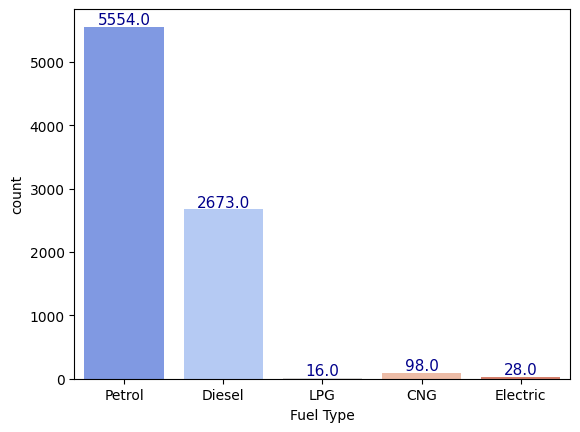

In [628]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=data, x='Fuel Type', palette='coolwarm')  # Customizing the color palette

# Adding counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='darkblue', xytext=(0, 5),
                textcoords='offset points')

plt.show()


****
**`Column:'Km'`**
- Changing the column name `km` to `Kilo Meter` for better readability.
- All the values are numerical. so changing the data type to int.

In [629]:
# renaming column 'bt' to 'Build Type'
data.rename(columns={'km':'Kilo Meter'}, inplace=True)

In [630]:
# changing data type to int.
data['Kilo Meter'] = data['Kilo Meter'].str.replace(',', '').astype(int)

****
**`Column:'Transmission'`**
- There were Two Transmission columns. So dropping the 'transmission' from the dataset.

In [631]:
# Dropping the 'transmission' column.
data.drop(columns=['transmission'], inplace=True)

data['Transmission'].value_counts()

Transmission
Manual       6052
Automatic    2317
Name: count, dtype: int64

****
**`Column: 'owner'`**
- Already having column `owner No` so droping the column `owner`.

In [632]:
# Dropping the 'owner' column.
data.drop(columns=['owner'], inplace=True)

****
**`Column: 'oem'`**

In [633]:
# Renaming column
data.rename(columns={'oem': 'OEM'}, inplace=True)

****
**`Columns : 'model' & 'variantName'`**
- Renaming columns for better readability.

In [634]:
data.rename(columns={'model': 'Model', 'variantName':'Variant Name'}, inplace=True)

****
**`Column : price`**
- Column `price` in object datatype. need to change 'float'. 

In [635]:
# Extract numerical values using regular expressions
data['price'] = data['price'].str.extract(r'₹ ([\d.]+) Lakh').astype(float)

In [636]:
# rename column 
data.rename(columns={'price':'Price'})

,Build Type,Kilo Meter,ownerNo,OEM,Model,modelYear,centralVariantId,Variant Name,Price,priceActual,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,Hatchback,120000,3,Maruti,Maruti Celerio,2015,3979,VXI,4.00,NaN,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN
1,SUV,32706,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,8.11,NaN,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN
2,Hatchback,11949,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,5.85,NaN,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN
3,Sedan,17794,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,4.62,NaN,...,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN
4,SUV,60000,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,7.90,NaN,...,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,10000,1,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,5.10,NaN,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless, Radial",5.0,313,NaN,NaN,NaN
8365,Hatchback,120000,1,Maruti,Maruti Alto 800,2014,3943,LXI,1.80,NaN,...,Solid Disc,Drum,140 kmph,19 Seconds,Tubeless Tyres,5.0,177-litres,NaN,NaN,NaN
8366,Sedan,50000,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,5.50,NaN,...,Ventilated Disc,Solid Disc,230km/hr,8.8 Seconds,"Tubeless,Radial",4.0,475-litres,17,17,NaN
8367,Hatchback,40000,1,Maruti,Maruti Ritz,2012,4144,ZXi,1.40,NaN,...,Ventilated Disc,Drum,156 Kmph,15 Seconds,"Tubeless,Radial",5.0,236-liters,14,14,NaN


****
**`COlumn : priceActual`**
- Getting numerical values by regular expression.

In [637]:
data['priceActual'] = data['priceActual'].str.extract(r'₹ ([\d.]+) Lakh').astype(float)

In [638]:
data.rename(columns={'priceActual':'PriceActual'},inplace=True)

****
**`Column:trendingText`**
- Droping the trendingText column to reduce dimensionality.

In [639]:
data.drop(columns=['trendingText'],inplace=True)

****
**`Column: Registration Year`**
- `Registration Year` will have a impact on the car valuation.
- Gong to drop the rows whose Registration Year value is null.
- The Column contains Alpha numeric so that getting only the number of registrations and the converted to `int` data type.

In [640]:
Reg_yr_null_values = data['Registration Year'].isnull().sum()
print(f"Registration Year has {Reg_yr_null_values} values before cleaning up.")

data = data.dropna(subset=['Registration Year'])
print(f"Registration Year has {data['Registration Year'].isnull().sum()} values after cleaning up.")

Registration Year has 52 values before cleaning up.
Registration Year has 0 values after cleaning up.


In [641]:
# Getting only the numeric values and converted to "int" datatype.
data['Registration Year'] = data['Registration Year'].str.extract(r'(\d+)').astype(int)

****
**`Column: Insurance Validity`**
- Checking for NUll Values and gonna drop all the rows having null `Insurance Validity` values.

In [642]:
data['Insurance Validity'].isnull().sum()

4

In [643]:
data = data.dropna(subset=['Insurance Validity'])
data.shape

(8313, 61)

In [644]:
data['Insurance Validity'].value_counts()

Insurance Validity
Third Party insurance    4013
Comprehensive            3143
Third Party               628
Zero Dep                  303
Not Available             222
1                           3
2                           1
Name: count, dtype: int64

- `Insurance Validity` has value `1` and `2` not having clear information so gonna drop all the rows having those values.
****

In [645]:
data = data[~data['Insurance Validity'].isin(['1', '2'])]


****
**`Column: Kms Driven`**
- The Column 'Kilo Meter' has already covered this data so that we can drop.

In [646]:
data.drop(columns=['Kms Driven'], inplace=True)

****
**`Column : RTO`**

In [647]:
data['RTO'].isnull().sum()

857

- Column `RTO` has 857 null values and I dont think it will have more impact on car valuation so we can drop.

In [648]:
data.drop(columns=['RTO'], inplace=True)

****
**`Column : Ownership`**
- Column 'OwnerNo' has already cover this data.
- So that we can drop this column.

In [649]:
data.drop(columns=['Ownership'], inplace=True)

****
**`Column : Engine Displacement`**
- Engine displacement has values with its unit 'CC'.
- Extracting only numeric.

In [650]:
data['Engine Displacement'].value_counts()

Engine Displacement
1197 cc    1602
998 cc      636
1199 cc     486
1497 cc     448
1248 cc     422
           ... 
3597 cc       1
2200 cc       1
1108 cc       1
2997 cc       1
2489 cc       1
Name: count, Length: 146, dtype: int64

In [651]:
print(f"Engine Displacement has {data['Engine Displacement'].isnull().sum()} Null values")

Engine Displacement has 2 Null values


In [652]:
# Droping null values.
data= data.dropna(subset=['Engine Displacement'])
data['Engine Displacement'] = data['Engine Displacement'].str.extract(r'(\d+)').astype(int)

****
**`Column : Year of Manufacture`**
- Want to get the values and change to datatype 'int'.

In [653]:
print(f"The data type of Year of Manufacture Before is {data['Year of Manufacture'].dtype}")
data['Year of Manufacture']=data['Year of Manufacture'].astype(int)
print(f"The data type of Year of Manufacture After is {data['Year of Manufacture'].dtype}")

The data type of Year of Manufacture Before is float64
The data type of Year of Manufacture After is int32


****
**`Column : Mileage`**
- `Mileage` is the predominant feature in evaluating car.
- So removing the null values and some values are in different units.
- Make all the data in kmpl.
- Datas in km/kg are converted to kmpl by multiplying with 0.75. 

In [654]:
print(f"Null values in Mileage before dropping: {data['Mileage'].isnull().sum()}")
data = data.dropna(subset=['Mileage'])
print(f"Null values in Mileage after dropping: {data['Mileage'].isnull().sum()}")

Null values in Mileage before dropping: 278
Null values in Mileage after dropping: 0


In [655]:
data['Mileage'].value_counts()

Mileage
18.9 kmpl      306
18.6 kmpl      225
21.4 kmpl      197
17 kmpl        190
18 kmpl        144
              ... 
18.9 km/kg       1
11.24 kmpl       1
31.12 km/kg      1
20.15 kmpl       1
12.98 kmpl       1
Name: count, Length: 521, dtype: int64

In [656]:
# Function to extract numeric value and handle conversion
def convert_mileage(row):
    value, unit = row.split(' ')
    value = float(value)
    if unit == 'km/kg':
        return value / 0.75
    else:
        return value


# Apply function to 'efficiency' column
data['Mileage'] = data['Mileage'].apply(convert_mileage)


In [657]:
data['Mileage'].dtype

dtype('float64')

****
**`Column : Engine`**
- The Values in Engine column are in string format.
- Only numeric values are extracted.

In [658]:
data['Engine'] = data['Engine'].str.extract(r'([\d]+) CC').astype(int)

****
**`Column : Max Power`**
- Max Power has mix of bhp and rpm in string format.
- Getting the bhp value only and change the data type to float.
- Max Power are in string with values in different units.
- Used Regular expression to get the Value of BHP.

In [659]:
data['Max Power'].value_counts()

Max Power
81.80bhp@6000rpm          282
81.86bhp@6000rpm          277
88.50bhp@6000rpm          267
83.1bhp@6000rpm           197
74bhp@4000rpm             170
                         ... 
170bhp@3000-4200            1
112.2 @ 4,000 (PS@rpm)      1
138bhp@3750rpm              1
335.2@5000-6400             1
75@5,500 (PS@rpm)           1
Name: count, Length: 711, dtype: int64

In [660]:
data['Max Power'].isnull().sum()

35

In [661]:
data = data.dropna(subset=['Max Power'])

import re
# Function to extract numeric value for bhp

def extract_bhp(row):
    # List of patterns to search for numeric values before 'bhp', 'hp', or 'ps' (case-insensitive)
    patterns = [r'(\d+\.?\d*)b?hp',r'(\d+\.?\d*)\s+b?hp', r'(\d+\.?\d*)@', r'(\d+\.?\d*)\s+@', r'(\d+\.?\d*)\s+p?s', r'(\d+\.?\d*)p?s', r'(\d+)\(', r'(\d+\.?\d*)\s*(?:bhp|ps)']
    
    for pattern in patterns:
        match = re.search(pattern, row, re.IGNORECASE)
        if match:
            # If a match is found, return the numeric value
            value = float(match.group(1))
            # Apply conversion factor if 'ps' is found
            if 'ps' in match.group(0).lower():
                value *= 0.986
            return value
    
    # If none of the patterns match, return None
    return None

# Apply function to 'power' column
data['Max Power(bhp)'] = data['Max Power'].apply(extract_bhp)

# Print Max Power before and after.
result = pd.DataFrame(data[['Max Power', 'Max Power(bhp)']])
print(result)


              Max Power  Max Power(bhp)
0      67.04bhp@6000rpm           67.04
1     121.31bhp@6500rpm          121.31
2         84bhp@6000rpm           84.00
3      81.86bhp@6000rpm           81.86
4       88.5bhp@4000rpm           88.50
...                 ...             ...
8364   65.71bhp@5500rpm           65.71
8365    47.3bhp@6000rpm           47.30
8366     186bhp@5600rpm          186.00
8367   85.80bhp@6000rpm           85.80
8368  108.45bhp@4000rpm          108.45

[7994 rows x 2 columns]


In [662]:
data.drop(columns=['Max Power'], inplace=True)

In [663]:
data['Max Power(bhp)'].dtype

dtype('float64')

****
**`Column : Color`**
- Color is a dominant factor in evaluating car.
- The default value is looking good.

In [664]:
data['Color'].value_counts()

Color
Others             2093
White              1558
Silver             1244
Red                 771
Blue                576
                   ... 
Passion Red           1
Hip Hop Black         1
Cherry                1
Falsa Colour          1
Out Back Bronze       1
Name: count, Length: 148, dtype: int64

****
**`Column : Engine Type`**
- Torque and Power are the outut of the Engine.
- Here I am leaving the column `Engine Type`.

In [665]:
data.drop(columns=['Engine Type'], inplace=True)

****
**`Column : Max Torque`**
- The value in this columns are in `String` format. 
- some values in the kgm format those were multiplied with `9.8` to make it `Nm`.

In [666]:
data["Max Torque"].value_counts()

Max Torque
90Nm@3500rpm                  375
200Nm@1750rpm                 283
113Nm@4200rpm                 273
113Nm@4400rpm                 238
110Nm@4800rpm                 230
                             ... 
400Nm@1400-2800                 1
127Nm@3500rpm                   1
32.6@1,750-2,500 (kgm@rpm)      1
115Nm@3750rpm                   1
171Nm@1800rpm                   1
Name: count, Length: 567, dtype: int64

In [667]:
import pandas as pd
import re

# Assuming 'data' is your DataFrame

data = data.dropna(subset=['Max Torque'])

def extract_torque(row):
    patterns = [r'(\d+\.?\d*)Nm', r'(\d+\.?\d*)\s+Nm', r'(\d+\.?\d*)\s+kgm',r'(\d+\.?\d*)@', r'(\d+\.?\d*)\s+@', r'(\d+\.?\d*)\s+\(']
    
    for pattern in patterns:
        match = re.search(pattern, row, re.IGNORECASE)
        if match:
            value = float(match.group(1))
            if 'kgm' in row.lower():  # Corrected 'ps' to 'kgm'
                value *= 9.8
            return value
    return None

data['Max Torque(Nm)'] = data['Max Torque'].apply(extract_torque)

torque_result = pd.DataFrame(data[['Max Torque', 'Max Torque(Nm)']])
print(torque_result)

torque_result.to_csv('cleaned_torque.csv')

              Max Torque  Max Torque(Nm)
0           90Nm@3500rpm           90.00
1          150Nm@4500rpm          150.00
2          114Nm@3500rpm          114.00
3       113.75Nm@4000rpm          113.75
4          200Nm@1750rpm          200.00
...                  ...             ...
8364        89Nm@3500rpm           89.00
8365        69Nm@3500rpm           69.00
8366  285Nm@2400-4000rpm          285.00
8367       114Nm@4000rpm          114.00
8368       245Nm@1750rpm          245.00

[7994 rows x 2 columns]


In [668]:
max_torque_null = data['Max Torque(Nm)'].isnull().sum()
data = data.dropna(subset='Max Torque(Nm)')
print('Null after dropped:', data['Max Torque(Nm)'].isnull().sum())

Null after dropped: 0


In [669]:
data.drop(columns=['Max Torque'], inplace=True)

****
**`Column : Value configuration`**
- The `Valve configuration` is meaningful. so changing the column name.
- valve values are in different reference. so grouping them by appropriate type.
- uff! there are more than 1900 null values . 20% of the data . so iam gonna dcrop this feature.

In [670]:
print(data['Value Configuration'].value_counts())
list(data['Value Configuration'].unique())

Value Configuration
DOHC                    4635
SOHC                    1252
DOHC                      80
undefined                 14
DOHC with VIS             12
iDSI                       8
DOHC with VGT              5
16-valve DOHC layout       3
23 Modules 69 Cells        1
DOHC with TIS              1
VTEC                       1
SOHC                       1
Name: count, dtype: int64


['DOHC',
 nan,
 'SOHC',
 'DOHC ',
 'undefined',
 'DOHC with VIS',
 'iDSI',
 '23 Modules 69 Cells',
 'DOHC with VGT',
 '16-valve DOHC layout',
 'DOHC with TIS',
 'VTEC',
 'SOHC ']

In [671]:
# rename the column
data = data.rename(columns={'Value Configuration':'Valve Configuration'})
# Define a dictionary to map misspelled words to their correct counterparts
corrections = {'DOHC ': 'DOHC','DOHC with VIS':'DOHC','DOHC with VGT':'DOHC', '16-valve DOHC layout':'DOHC', 'DOHC with TIS':'DOHC','SOHC ':'SOHC' }  # Add more mappings as needed

# Replace misspelled words with correct ones
data['Valve Configuration'] = data['Valve Configuration'].replace(corrections)

In [672]:
data['Valve Configuration'].value_counts()

Valve Configuration
DOHC                   4736
SOHC                   1253
undefined                14
iDSI                      8
23 Modules 69 Cells       1
VTEC                      1
Name: count, dtype: int64

In [673]:
removing_values = ['undefined','23 Modules 69 Cells','VTEC']
data = data[~data['Valve Configuration'].isin(removing_values)]

In [674]:
data['Valve Configuration'].value_counts()

Valve Configuration
DOHC    4736
SOHC    1253
iDSI       8
Name: count, dtype: int64

In [675]:
data['Valve Configuration'].isnull().sum()

1977

In [676]:
data.drop(columns=['Valve Configuration'], inplace=True)

****
**`Column : BoreX Stroke`**
- Torque and Power are related with bore. so we can drop this feature.

In [677]:
data.drop(columns=['BoreX Stroke'], inplace=True)

In [678]:
data['Compression Ratio'].value_counts()

Compression Ratio
10.5:1       286
11.0:1       226
10.3:1       224
17.6:1       176
16.0:1       144
            ... 
9.5 : 1        1
12.0 ±0.3      1
11.04:1        1
11:1           1
16.8:1         1
Name: count, Length: 72, dtype: int64

****
**`COlumn : Compression Ratio`**
- `Compression Ratio` have a relationship with torqe and power. so we can drop this feature.

In [679]:
data.drop(columns=['Compression Ratio'],inplace=True)

****
**`Column : Turbo Charger`**
- Spell errors in the values of Turbo Charger.
- Uff around 990 values are null . so i am gonna drop this feature.

In [680]:
corrections = {'NO': 'No', 'YES': 'Yes', 'no':'No', 'yes':'Yes', 'Turbo':'Yes', 'twin':'Yes', 'Twin':'Yes'}
# spell correcting
data['Turbo Charger'] = data['Turbo Charger'].replace(corrections) 

In [681]:
data['Turbo Charger'].value_counts()

Turbo Charger
No     4168
Yes    2872
Name: count, dtype: int64

In [682]:
data['Turbo Charger'].isnull().sum()

934

In [683]:
data.drop(columns=['Turbo Charger'], inplace=True)

****
**`Column : Super Charger`**
- Around 1650 values are null. so i am going to drop the column.

In [684]:
data["Super Charger"].isnull().sum()

1657

In [685]:
data.drop(columns=['Super Charger'], inplace=True)

****
**`Dropping Unwanted Columns`**

In [686]:
Columns_to_drop = ['Torque','Length','Width','Height','Wheel Base','Fuel Suppy System','Front Tread','Rear Tread','Kerb Weight','Gross Weight','Gear Box','Drive Type','Steering Type','Turning Radius','Front Brake Type','Rear Brake Type','Top Speed','Acceleration','Tyre Type','Cargo Volumn','Wheel Size','Alloy Wheel Size','Ground Clearance Unladen']

data = data.drop(columns=Columns_to_drop)

In [687]:
categorical_columns = [column for column in data.columns if data[column].dtype == "object"]
numerical_columns = [column for column in data.columns if data[column].dtype != "object"]

print("categorical columns:\n", categorical_columns, "\n\n Numerical columns:\n", numerical_columns)

categorical columns:
 ['Build Type', 'OEM', 'Model', 'Variant Name', 'Insurance Validity', 'Fuel Type', 'Transmission', 'Color'] 

 Numerical columns:
 ['Kilo Meter', 'ownerNo', 'modelYear', 'centralVariantId', 'price', 'PriceActual', 'priceSaving', 'priceFixedText', 'Registration Year', 'Seats', 'Engine Displacement', 'Year of Manufacture', 'Mileage', 'Engine', 'Displacement', 'No of Cylinder', 'Values per Cylinder', 'Seating Capacity', 'No Door Numbers', 'Max Power(bhp)', 'Max Torque(Nm)']


****
# **`Cleaning NUmerical Columns:`**

****
**`COlumn : No Door Numbers`**
- Changing the column name for better readability. 

In [696]:
print(data['No Door Numbers'].value_counts())
data['No Door Numbers'].isnull().sum()

No Door Numbers
5.0    5502
4.0    2433
3.0      24
2.0      10
6.0       2
Name: count, dtype: int64


3

In [698]:
data.dropna(subset='No Door Numbers',inplace=True)
data.rename(columns={'No Door Numbers' : 'No Of Doors'}, inplace=True)

****
**Columns `'PriceActual', 'priceSaving', 'priceFixedText'` are having huge null values. i am going to drop it.**

In [699]:
Columns_to_drop = ['PriceActual', 'priceSaving', 'priceFixedText']
data.drop(columns=Columns_to_drop, inplace=True)

****
**`Column : Values per Cylinder`**
- Dropping the null values in values per Cylinder.

In [708]:
print(data['Values per Cylinder'].isnull().sum())
data.dropna(subset='Values per Cylinder', inplace=True)

19


****
**`Column : 'Seating Capacity'`**
- the COlumn Seating Capacity is already covered by the column seats.

In [716]:
data.drop(columns=['Seating Capacity'], inplace=True)

****
# **`Saving Cleaned datafile`**

In [718]:
data.to_csv('Cleaned_data.csv', index=False)